In [42]:
import os, sys, getopt, pdb
import random as pr
import numpy as np
import numpy.random as npr
import pickle
import time

from __future__ import division

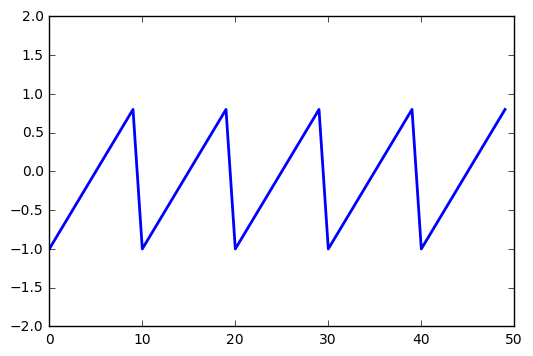

In [63]:
class TD(object):


    def __init__(self, nstates, alpha, gamma, ld, init_val = 0.0):
        self.V = np.ones(nstates) * init_val
        self.e = np.zeros(nstates)
        self.nstates = nstates
        self.alpha = alpha # learning rate
        self.gamma = gamma # discount
        self.ld = ld # lambda

    def value(self, state):
        return self.V[state]

    def delta(self, pstate, reward, state):
        return reward + (self.gamma * self.value(state)) - self.value(pstate)

    def train(self, pstate, reward, state):
        delta = self.delta(pstate, reward, state)
        self.e[pstate] += 1.0
        #for s in range(self.nstates):
#         print "ade", self.alpha, delta, self.e
        self.V += self.alpha * delta * self.e
        self.e *= (self.gamma * self.ld)

        return delta

    def learn(self, nepisodes, verbose = False):
        # learn for niters episodes with resets
        
        index = 0
        
        for i in range(nepisodes):
            self.reset()
            single_episode_trace = []
            for _ in range(5):
                # one cycle
                for j in range(10):
                    prev_state = np.zeros(10)
                    prev_state[j] = 1
                    next_state = np.zeros(10)
                    if j == 9:
                        next_state[j] = 1
                    else:
                        next_state[j+1] = 1
                    rew = (j - 5) / 5
                    single_episode_trace.append([prev_state, rew, next_state])
                    
                
#             if i % 5 == 0:
#                 single_episode_trace = [[[1, 0, 0], -1, [1, 0, 0]], [[1, 0, 0], 1, [0, 1, 0]],
#                                         [[0, 1, 0], 10, [0, 1, 0]], [[0, 1, 0], 10, [0, 1, 0]]]
#             else:
#                 single_episode_trace = [[[1, 0, 0], -1, [0, 0, 1]], [[0, 0, 1], -10, [0, 0, 1]],
#                                         [[0, 0, 1], -10, [0, 0, 1]], [[0, 0, 1], -10, [0, 0, 1]]]
            for (previous_state, reward, state) in single_episode_trace:
#                 print "prs", previous_state, reward, state
                self.train(previous_state, reward, state)
                
                self.actual_reward[index % 50] = reward
                self.predicted_reward[index % 50] = self.value(previous_state)
                index += 1
#                 time.sleep(0.01)
            if verbose and i % 10 == 0:
                print i, self.td_error()

    def reset(self):
        self.e = np.zeros(self.nstates)
    

class TDLinear(TD):

    
    def __init__(self, nfeatures, alpha, gamma, ld):
        self.params = np.zeros(nfeatures)
        self.e = np.zeros(nfeatures)
        self.nfeatures = nfeatures
        self.nstates = nfeatures
        self.alpha = alpha # learning rate
        self.gamma = gamma # discount
        self.ld = ld # lambda
        
        # plotting variables
        self.actual_reward = np.zeros(50)
        self.predicted_reward = np.zeros(50)

    def value(self,features):
        return np.dot(self.params,features)

    def train(self, pfeatures, reward, features):
        delta = self.delta(pfeatures, reward, features)
        self.e = self.gamma * self.ld * self.e + pfeatures
        self.params = self.params + self.alpha * delta * self.e

    def reset(self):
        self.e = np.zeros(self.nstates)
    
    def td_error(self):
        # actual reward for each state --> actual[0] is for state 0 which is represented as [1 0 .. 0]
        actual = np.zeros(10)
        pred = np.zeros(10)
        for j in range(10):
            actual[j] = (j - 5) / 5
            x = np.zeros(10)
            x[j] = 1
            pred[j] = self.value(x)
        
        return np.sum(np.absolute(actual - pred))/10


alpha = 0.1 # learning rate
gamma = 0.01 # discount factor
ld = 0.8
learner = TDLinear(10, alpha, gamma, ld)

#================================================================
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 50))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 49, 50)
    y = learner.actual_reward
    learner.learn(1)
#     if int(time.time()) % 3 == 0:
#         y = np.sin(2 * np.pi * (x - 0.01 * i))
#     else:
#         y = np.sin(2 * np.pi ** 2 * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# HTML(anim.to_html5_video())
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim
#=====================================================================================
# print learner.params

In [49]:
np.linspace(0, 49, 50)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.])

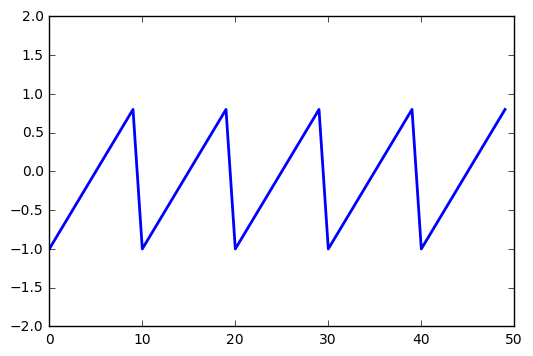

In [60]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 50))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 49, 50)
    learner.actual_reward = np.roll(learner.actual_reward, 1)
    y = learner.actual_reward
#     if int(time.time()) % 3 == 0:
#         y = np.sin(2 * np.pi * (x - 0.01 * i))
#     else:
#         y = np.sin(2 * np.pi ** 2 * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=40, blit=True)

# HTML(anim.to_html5_video())
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim

In [61]:
learner.actual_reward = np.zeros(50)